In [3]:
import pandas as pd
import numpy as np

import nltk
from collections import Counter
import string
import sklearn

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use(['seaborn-paper', 'fivethirtyeight', 'seaborn-whitegrid'])

In [4]:
df = pd.read_csv('one_restau_reviews.csv')
df.head()

,Unnamed: 0,date,rates,text,user_name
0,0,2/24/2019,5.0,Went there today for the first time. Amazing c...,Eron G.
1,1,2/19/2019,3.0,I'm a big BBQ gal as I used to work at a BBQ r...,Kristen W.
2,2,2/13/2019,5.0,"It feels dramatic, but I think I had some of t...",Abi M.
3,3,12/30/2018,5.0,Amazing layout in and old building that just s...,Shawna C.
4,4,12/1/2018,2.0,"Very reasonably priced with large portions, bu...",Claire W.


In [5]:
df.columns

Index(['Unnamed: 0', 'date', 'rates', 'text', 'user_name'], dtype='object')

In [6]:
df.drop(['Unnamed: 0'],axis=1, inplace=True)

In [7]:
df.head()

,date,rates,text,user_name
0,2/24/2019,5.0,Went there today for the first time. Amazing c...,Eron G.
1,2/19/2019,3.0,I'm a big BBQ gal as I used to work at a BBQ r...,Kristen W.
2,2/13/2019,5.0,"It feels dramatic, but I think I had some of t...",Abi M.
3,12/30/2018,5.0,Amazing layout in and old building that just s...,Shawna C.
4,12/1/2018,2.0,"Very reasonably priced with large portions, bu...",Claire W.


### look at rates

(array([ 14.,   0.,  23.,   0.,   0.,  36.,   0.,  68.,   0., 228.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

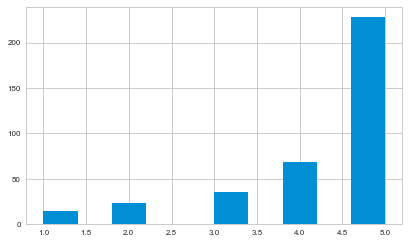

In [31]:
plt.hist(df.rates)

In [30]:
y = df.rates == 5

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', min_df=1)


X = vectorizer.fit_transform(df.text)

In [41]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

clf.fit(X_train, y_train)
clf.score(X_train, y_train)

G:\anaconda_3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8565891472868217

In [42]:
clf.fit(X_test, y_test)
clf.score(X_test, y_test)

0.9369369369369369